### Extração de dados de despesas da prefeitura de Fortaleza
#### Período disponível: 2007 a 2020

#### Endereço: https://transparenciamunicipios.tce.ce.gov.br/index.php/municipios/despesas/mun/057/versao/2020

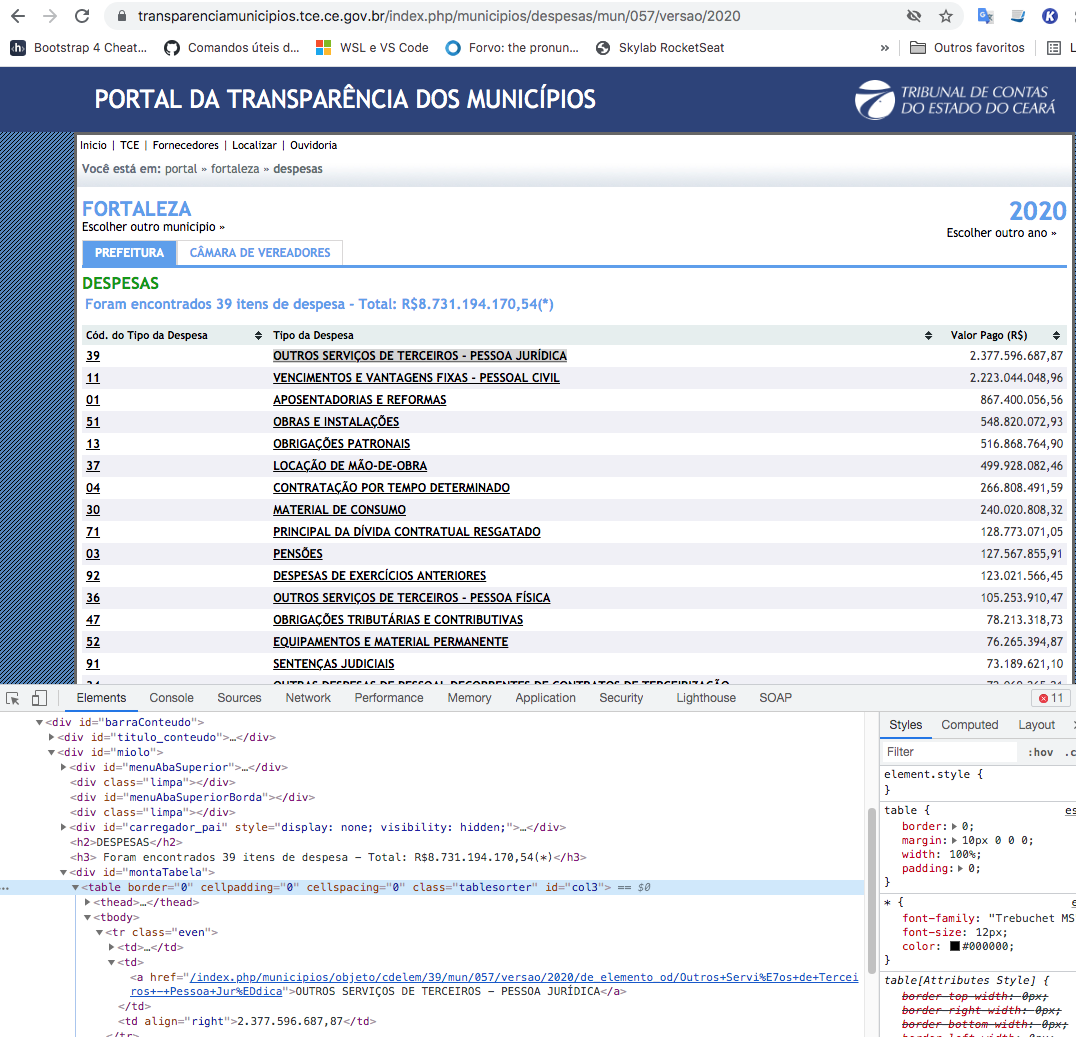

In [1]:
from bs4 import BeautifulSoup

import requests
import pandas as pd
import csv
import numpy as np

start_dt=2007 # em 2001, 2003, 2006 nao tem nada
end_dt=2020

# tomando duas cidades como exemplo
cities = { "057": "Fortaleza", "162": "Sobral" }
data = []

In [2]:
# fazendo o scraping
for k,v in cities.items():
    for year in range (start_dt, end_dt+1):
        # formato: https://transparenciamunicipios.tce.ce.gov.br/index.php/municipios/despesas/mun/057/versao/2020
        url='https://transparenciamunicipios.tce.ce.gov.br/index.php/municipios/despesas/mun/'+k+'/versao/'+str(year)

        html = requests.get(url).content
        soup = BeautifulSoup(html, 'html.parser')

        tb = soup.find("tbody")

        if (tb is not None): # alguns anos nao tem dados
            rows = tb.find_all('tr')
            for row in rows: 
                cols = row.find_all('td')
                cols = [ele.text.strip() for ele in cols]

                if (not cols==[]):
                    # adiciona col ano
                    cols.append(year)
                    cols.append(v)
                    data.append(cols)

data

[['11',
  'VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL',
  '664.707.341,25',
  2007,
  'Fortaleza'],
 ['39',
  'OUTROS SERVIÃ\x87OS DE TERCEIROS - PESSOA JURÃ\x8dDICA',
  '568.908.383,07',
  2007,
  'Fortaleza'],
 ['13', 'OBRIGAÃ\x87Ã\x95ES PATRONAIS', '154.204.010,58', 2007, 'Fortaleza'],
 ['37',
  'LOCAÃ\x87Ã\x83O DE MÃ\x83O-DE-OBRA',
  '118.892.999,56',
  2007,
  'Fortaleza'],
 ['51', 'OBRAS E INSTALAÃ\x87Ã\x95ES', '110.634.188,24', 2007, 'Fortaleza'],
 ['01',
  'APOSENTADORIAS DO RPPS, RESERVA REMUNERADA E REFORMAS DOS MILITARES',
  '109.448.363,85',
  2007,
  'Fortaleza'],
 ['30', 'MATERIAL DE CONSUMO', '76.493.451,98', 2007, 'Fortaleza'],
 ['34',
  'OUTRAS DESPESAS DE PESSOAL DECORRENTES DE CONTRATOS DE TERCEIRIZAÃ\x87Ã\x83O',
  '55.228.029,78',
  2007,
  'Fortaleza'],
 ['36',
  'OUTROS SERVIÃ\x87OS DE TERCEIROS - PESSOA FÃ\x8dSICA',
  '42.582.187,14',
  2007,
  'Fortaleza'],
 ['03',
  'PENSÃ\x95ES DO RPPS E DO MILITAR',
  '38.111.902,94',
  2007,
  'Fortaleza'],
 ['92',
  'DES

In [8]:
len(data)

894

In [3]:
# verificando, removendo identificacoes
df = pd.DataFrame(data)
df.columns = ['codigo', 'tipo_despesa', 'valor', 'ano', 'cidade']

# formato atual: 1.000,00 -> passar para 1000.0 e converter para float
# remove pontos
df['valor'] = df['valor'].str.replace(".", "",regex=False)
# troca virgula por ponto
df['valor'] = df['valor'].str.replace(",", ".",regex=False)
df['valor'] = df['valor'].astype(float)

df

,codigo,tipo_despesa,valor,ano,cidade
0,11,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL,6.647073e+08,2007,Fortaleza
1,39,OUTROS SERVIÃOS DE TERCEIROS - PESSOA JURÃDICA,5.689084e+08,2007,Fortaleza
2,13,OBRIGAÃÃES PATRONAIS,1.542040e+08,2007,Fortaleza
3,37,LOCAÃÃO DE MÃO-DE-OBRA,1.188930e+08,2007,Fortaleza
4,51,OBRAS E INSTALAÃÃES,1.106342e+08,2007,Fortaleza
...,...,...,...,...,...
889,03,PENSÃES DO RPPS E DO MILITAR,2.993341e+05,2020,Sobral
890,31,"PREMIAÃÃES CULTURAIS, ARTÃSTICAS, CIENTÃFI...",2.606698e+05,2020,Sobral
891,43,SUBVENÃÃES SOCIAIS,2.370000e+05,2020,Sobral
892,33,PASSAGENS E DESPESAS COM LOCOMOÃÃO,1.409385e+04,2020,Sobral


In [10]:
df.isna().sum()

codigo          0
tipo_despesa    0
valor           0
ano             0
cidade          0
dtype: int64

In [4]:
# gerando csv do df
# alterando encoding
df.to_csv (r'despesas_v3.csv', index = False, header=True, encoding='iso-8859-1')